In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
from scipy import stats

In [22]:
df = pd.read_csv('home_price_cleaned.csv')
df.info()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20131 entries, 0 to 20130
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Net_Metrekare       20131 non-null  int64  
 1   Brüt_Metrekare      20131 non-null  float64
 2   Oda_Sayısı          20131 non-null  float64
 3   Bulunduğu_Kat       20131 non-null  object 
 4   Eşya_Durumu         20131 non-null  object 
 5   Binanın_Yaşı        20131 non-null  object 
 6   Isıtma_Tipi         20131 non-null  object 
 7   Fiyat               20131 non-null  float64
 8   Şehir               20131 non-null  object 
 9   Binanın_Kat_Sayısı  20131 non-null  int64  
 10  Kullanım_Durumu     20131 non-null  object 
 11  Yatırıma_Uygunluk   20131 non-null  object 
 12  Takas               20131 non-null  object 
 13  Tapu_Durumu         20131 non-null  object 
 14  Banyo_Sayısı        20131 non-null  float64
dtypes: float64(4), int64(2), object(9)
memory usage: 2.3+

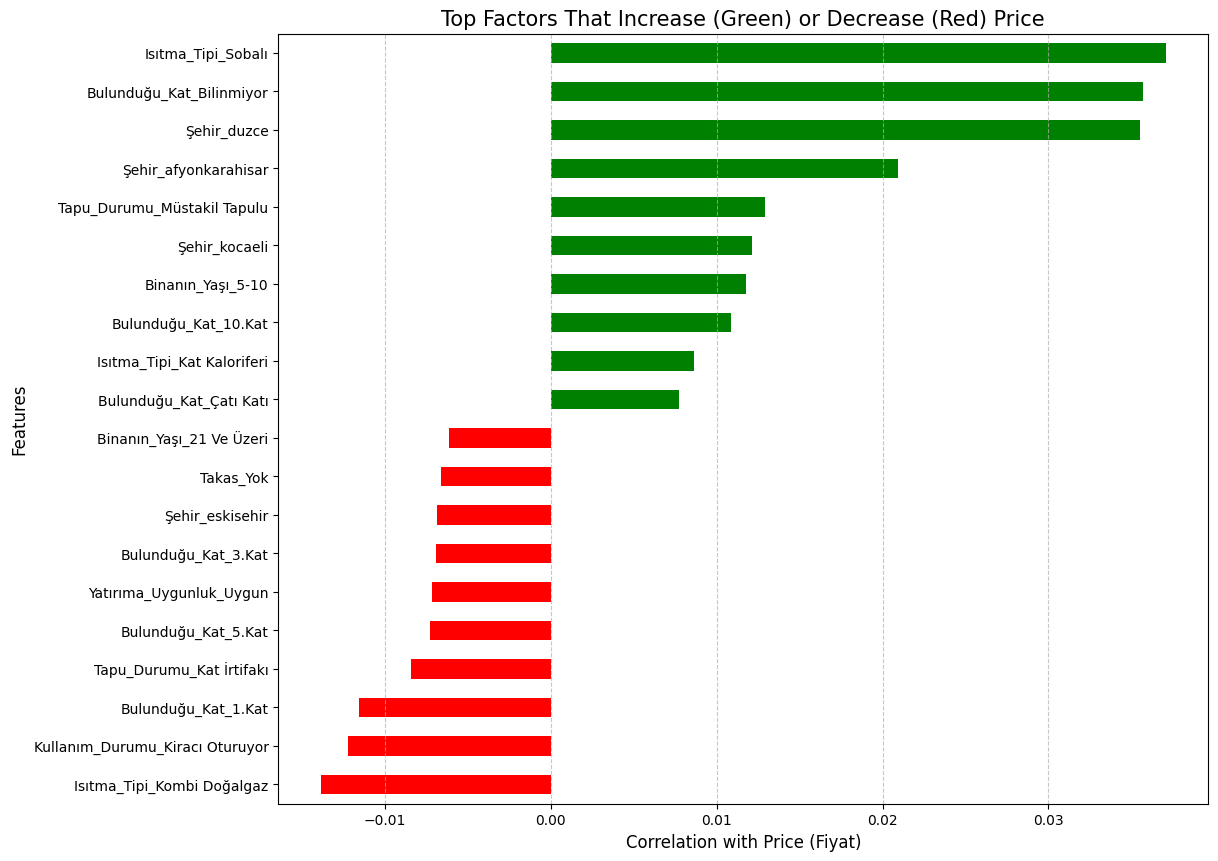

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Define the columns you want to analyze
cat_cols = [
    'Bulunduğu_Kat', 'Eşya_Durumu', 'Binanın_Yaşı', 
    'Isıtma_Tipi', 'Şehir', 'Kullanım_Durumu', 
    'Yatırıma_Uygunluk', 'Tapu_Durumu', 'Takas'
]

# 2. Convert categorical variables into dummy/indicator variables (One-Hot Encoding)
# This turns "City: Istanbul" into a column of 1s and 0s
df_encoded = pd.get_dummies(df[cat_cols], drop_first=False)

# 3. Add Fiyat back to this dataframe to calculate correlation
df_encoded['Fiyat'] = df['Fiyat']

# 4. Calculate correlation of every feature with 'Fiyat'
correlations = df_encoded.corr()['Fiyat'].sort_values()

# 5. Remove 'Fiyat' itself from the list so it doesn't show as 1.0
correlations = correlations.drop('Fiyat')

# 6. Select the Top 10 Positive and Top 10 Negative factors
top_positive = correlations.tail(10)
top_negative = correlations.head(10)
top_factors = pd.concat([top_negative, top_positive])

# 7. Plotting
plt.figure(figsize=(12, 10))
colors = ['red' if x < 0 else 'green' for x in top_factors.values]
top_factors.plot(kind='barh', color=colors)

plt.title('Top Factors That Increase (Green) or Decrease (Red) Price', fontsize=15)
plt.xlabel('Correlation with Price (Fiyat)', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



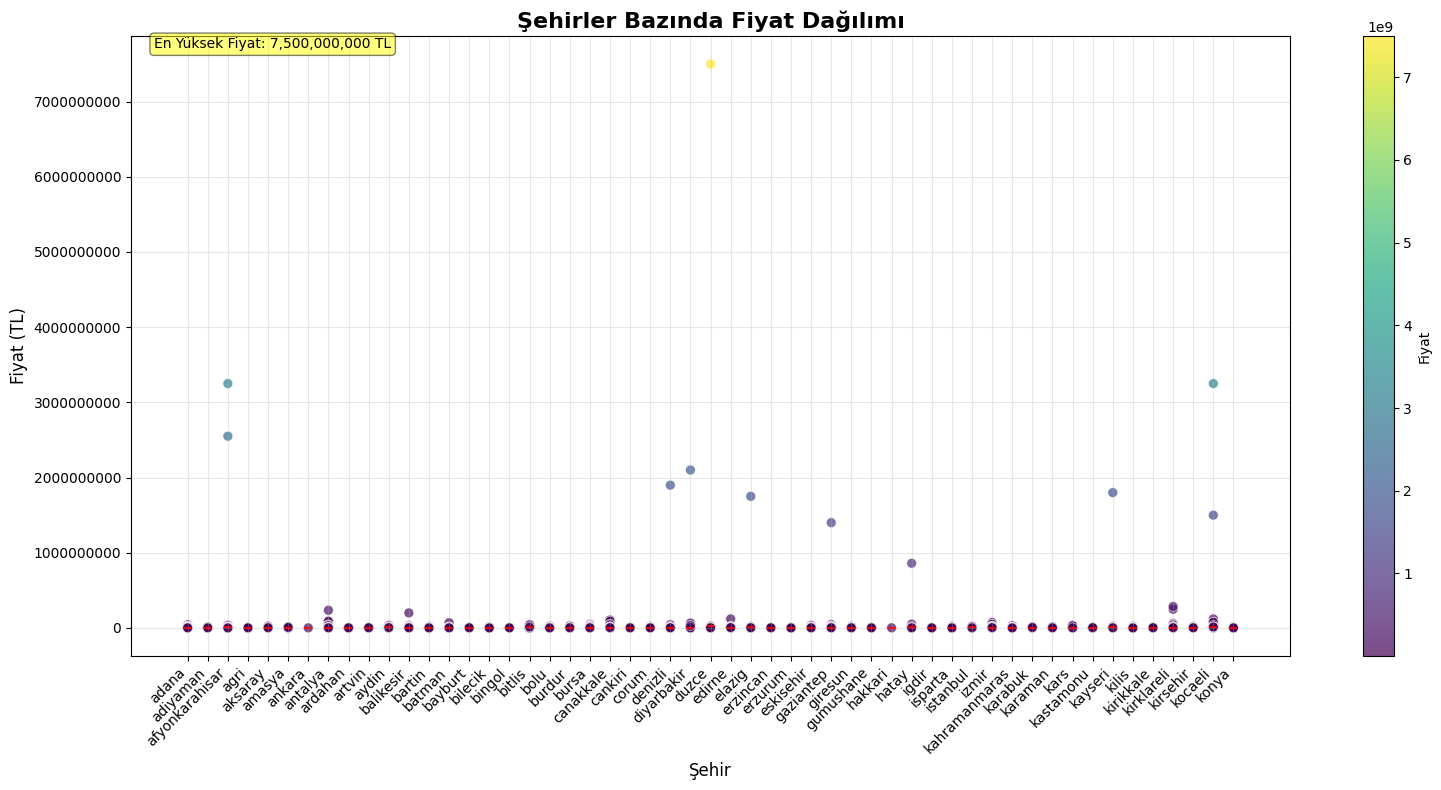

Şehir Bazında Fiyat İstatistikleri:
----------------------------------------
Toplam Kayıt Sayısı: 20326
Benzersiz Şehir Sayısı: 53
Ortalama Fiyat: 4,649,510.22 TL
Medyan Fiyat: 2,300,000.00 TL

En Yüksek Ortalama Fiyata Sahip 5 Şehir:
Şehir
duzce             2.329520e+07
afyonkarahisar    1.396118e+07
istanbul          1.032438e+07
kocaeli           7.980657e+06
elazig            7.185055e+06
Name: Fiyat, dtype: float64

İlan Sayısına Göre Şehirler:
Şehir
antalya       1450
adana         1449
denizli       1449
diyarbakir    1449
gaziantep     1446
kocaeli       1325
canakkale      954
eskisehir      947
bursa          847
kirklareli     659
Name: count, dtype: int64


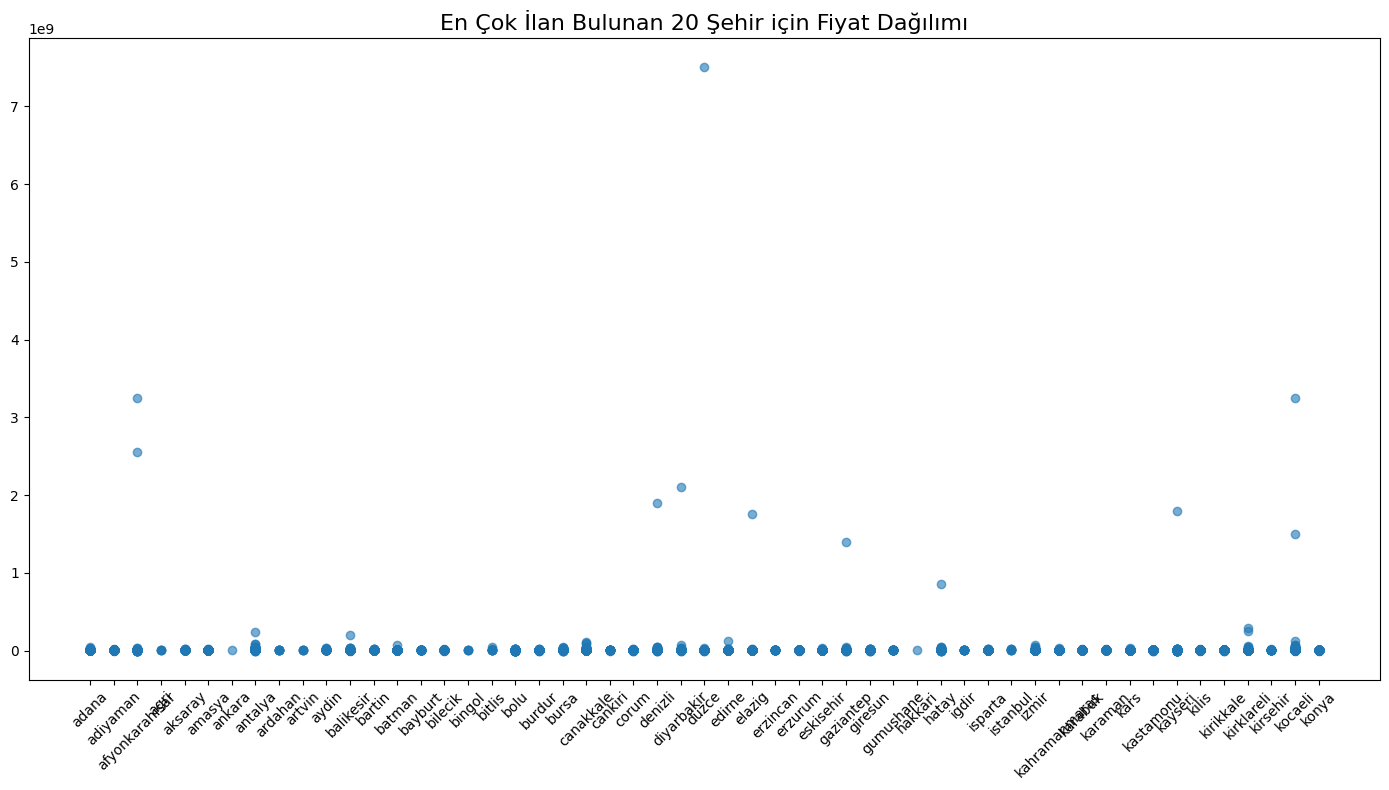

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(16, 8))
df = pd.read_csv('home_price_original.csv')
# Create scatter plot with color based on price
scatter = plt.scatter(
    df['Şehir'], 
    df['Fiyat'], 
    c=df['Fiyat'], 
    cmap='viridis', 
    alpha=0.7, 
    edgecolors='w', 
    linewidth=0.5,
    s=50  # Size of points
)

# Add colorbar
plt.colorbar(scatter, label='Fiyat')

# Calculate and add average price per city
avg_prices = df.groupby('Şehir')['Fiyat'].mean()
for idx, (city, avg_price) in enumerate(avg_prices.items()):
    plt.hlines(avg_price, idx-0.2, idx+0.2, colors='red', linestyles='dashed', alpha=0.8)

# Customize
plt.title('Şehirler Bazında Fiyat Dağılımı', fontsize=16, fontweight='bold')
plt.xlabel('Şehir', fontsize=12)
plt.ylabel('Fiyat (TL)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True, alpha=0.3)

# Add annotation for insights
max_price = df['Fiyat'].max()
min_price = df['Fiyat'].min()
plt.annotate(f'En Yüksek Fiyat: {max_price:,.0f} TL', 
             xy=(0.02, 0.98), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.5))

plt.tight_layout()
plt.show()

# Print summary statistics
print("Şehir Bazında Fiyat İstatistikleri:")
print("-" * 40)
print(f"Toplam Kayıt Sayısı: {len(df)}")
print(f"Benzersiz Şehir Sayısı: {df['Şehir'].nunique()}")
print(f"Ortalama Fiyat: {df['Fiyat'].mean():,.2f} TL")
print(f"Medyan Fiyat: {df['Fiyat'].median():,.2f} TL")
print("\nEn Yüksek Ortalama Fiyata Sahip 5 Şehir:")
print(avg_prices.sort_values(ascending=False).head())

# Count properties per city
city_counts = df['Şehir'].value_counts()
print("\nİlan Sayısına Göre Şehirler:")
print(city_counts.head(10))

# Alternative: Show only top 20 cities by count
top_cities = df['Şehir'].value_counts().head(20).index
filtered_data = df[df['Şehir'].isin(top_cities)]

plt.figure(figsize=(14, 8))
plt.scatter(df['Şehir'], df['Fiyat'], alpha=0.6)
plt.title('En Çok İlan Bulunan 20 Şehir için Fiyat Dağılımı', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

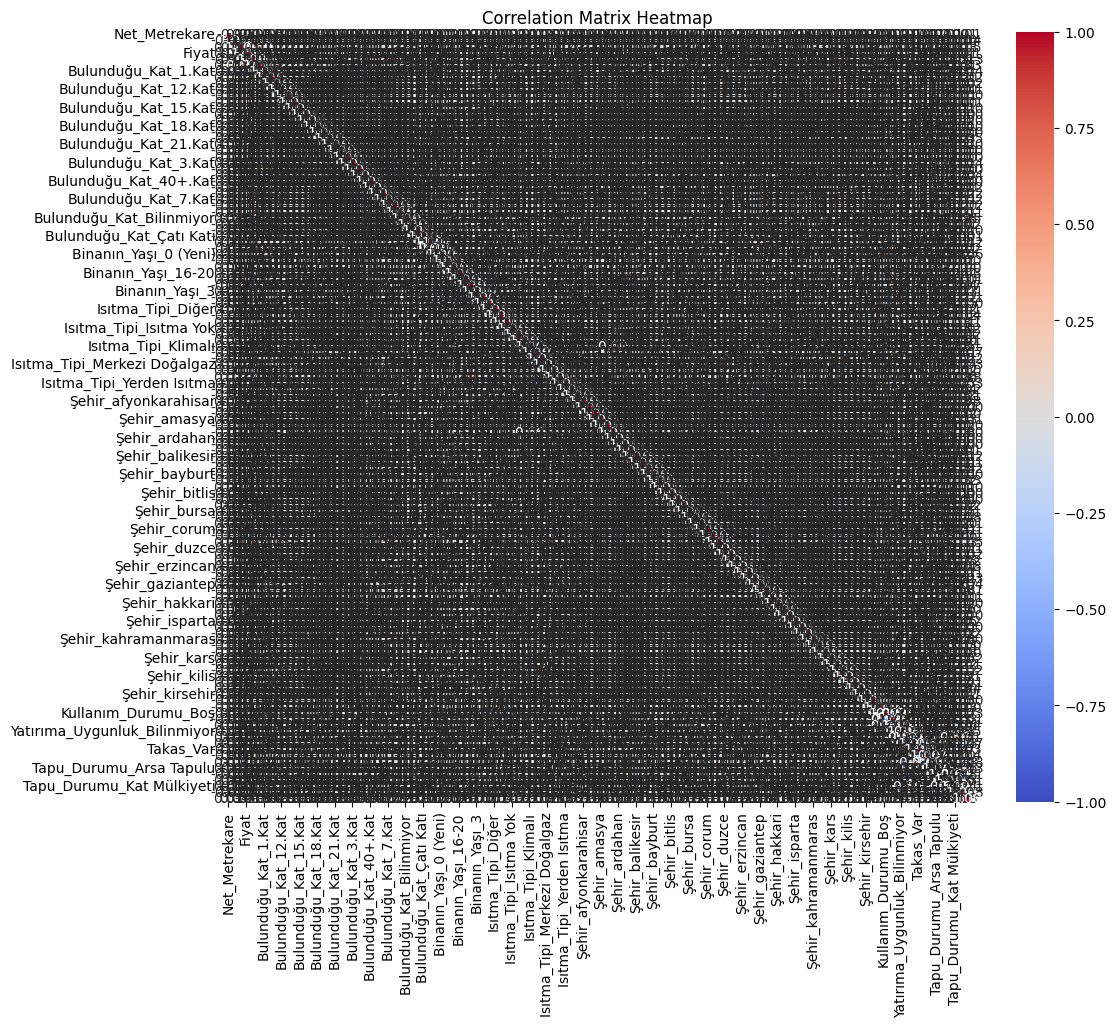

In [25]:
df = pd.read_csv('home_price_cleaned_OHE.csv')  
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

